In [1]:
# -*- coding: utf-8 -*-
import sys
import pandas as pd
import numpy as np
import matplotlib
import scipy as sp
import IPython
import sklearn
import matplotlib.pyplot as plt
import mglearn

In [3]:
mglearn.plots.plot_linear_regression_wave()

w[0]: 0.393906  b: -0.031804


### 线性回归
最小二乘法，寻找参数w和b，使得对训练集的预测值和真实的回归目标值y之间的均方误差（MSE）最小

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [6]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[ 0.39390555]
lr.intercept_:-0.031804343026759746


In [7]:
print("Training set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test, y_test)))

Training set score:0.67
Test set score:0.66


$R^2$效果不是很好，很有可能是欠拟合，对一维数据来说，过拟合的风险很小。然而对于更高维的数据集，线性模型将变得更加强大，过拟合的可能性也会变得更大

In [8]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test, y_test)))

Training set score:0.95
Test set score:0.61


训练集和测试集之间的性能差异是过拟合的明显标志，标准线性回归最常用的替代方法之一就是岭回归
### 岭回归
岭回归也是一种用于回归的线性模型，因此它的预测公式与普通最小二乘法相同。但在岭回归中，对系数w的选择不仅在训练数据上得到好的预测结果，而且还要拟合附加约束。我们还希望系数w尽量小。换句话说，w的所有元素都应接近于0.直观上来看，这意味着每个特征对输出的影响尽可能小，同时仍给出很好的预测结果。这种约束是所谓的**正则化**的一个例子。岭回归用到的是L2正则化

In [9]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge.score(X_test, y_test)))

Training set score:0.89
Test set score:0.75


Ridge模型在模型的简单性与训练集性能之间做平衡，这可以通过设置alpha参数来指定。增大alpha会使系数更加趋向于0，从而降低训练集性能，但可能会提高泛化能力。

In [10]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge10.score(X_test, y_test)))

Training set score:0.79
Test set score:0.64


In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge01.score(X_test, y_test)))

Training set score:0.93
Test set score:0.77


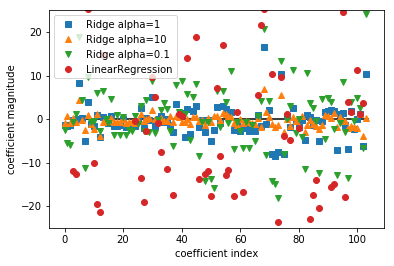

In [13]:
%matplotlib inline
plt.plot(ridge.coef_,'s',label = "Ridge alpha=1")
plt.plot(ridge10.coef_,'^',label = "Ridge alpha=10")
plt.plot(ridge01.coef_,'v',label = "Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

可以从图中看出，alpha值越小，则分布范围越大。还有一种方法可以理解正则化的影响，就是固定alpha值，改变训练数据量。将模型性能作为数据集大小的函数进行绘图，这样的图像叫做学习曲线。

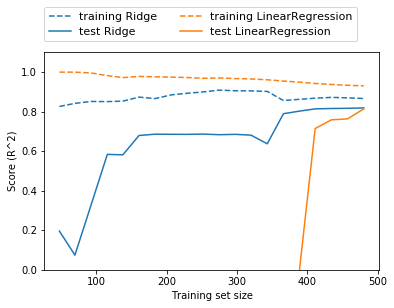

In [14]:
mglearn.plots.plot_ridge_n_samples()

从图中看出，对于较小的数据集，如果少于400个数据点，线性回归学不到任何内容。随着模型可用的数据越来越多，两个模型的性能都在提升，最终线性回归追上了岭回归。这里要记住的是，如果有足够多的训练数据，正则化变得不那么重要，并且岭回归和线性回归拥有相同的性能。

### lasso
lasso也是约束系数使其接近于0，但用到的方法不同，叫做L1正则化，使用L1正则化的结果是，使用lasso时，某些系数刚好为0，这说明某些特征被模型完全忽略。

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score:0.29
Test set score:0.21
Number of features used: 4


lasso在训练集和测试集上表现都很差，这表示存在欠拟合，这是由于只使用了105个特征中的4个，我们需要调整其参数值alpha，将其调小，同时还要增加max_iter的值（运行迭代的最大次数）

In [16]:
lasso001=Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score:0.90
Test set score:0.77
Number of features used: 33


alpha值变小，我们可以拟合一个更复杂的模型，在训练集和测试集上的表现更好；但如果把alpha设置得太小，就会消除正则化的效果，并出现过拟合。在实践中，一般首选岭回归，如果特征很多，只有其中几个是重要的，那么选择Lasso可能更好。sklearn还提供了ElasticNet结合了Lasso和Ridge的惩罚项。实践中，这种效果最好，不过代价是调整两个参数：一个用于L1正则化，一个用于L2正则化。

### 线性分类

线性模型二分类的应用，与0比较进行判断。学习线性模型有很多种算法，这些算法的区别在于以下两点：
- 系数和截距的特定组合对训练数据的拟合好坏的度量方法
- 是否使用正则化，以及使用哪种正则化

最常见的两种线性分类方法是Logistic回归和线性支持向量机，虽然Logistic回归的名字中有回归，但它是一种分类算法，不是回归算法。

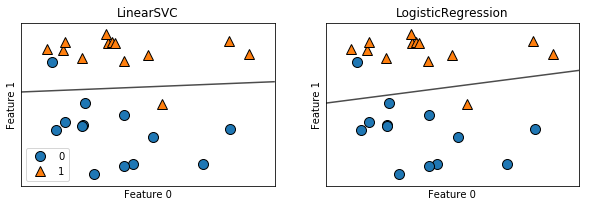

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

两个模型都使用了L2正则化。对于LogisticRegression和LinearSVC，决定正则化强度的权衡参数叫做C。C值越大，对应的正则化越弱。也就是说，如果C越大，那两个模型将尽可能将训练集拟合到最好，，而如果C值较小，那么模型更强调使系数向量接近于0.较小的C值可以让算法适应“大多数”数据点，而较大的C值更强调每个数据点都正确分类。

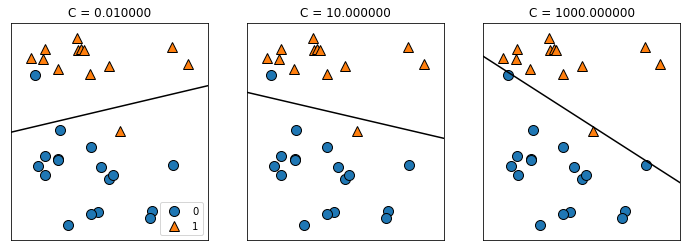

In [20]:
mglearn.plots.plot_linear_svc_regularization()

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_test, y_test)))

Training set score:0.953
Test set score:0.958


In [22]:
#增大C来拟合一个更灵活的模型
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg100.score(X_test, y_test)))

Training set score:0.972
Test set score:0.965


In [23]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg001.score(X_test, y_test)))

Training set score:0.934
Test set score:0.930


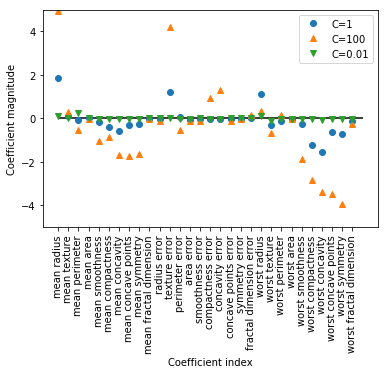

In [24]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Train accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Train accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Train accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


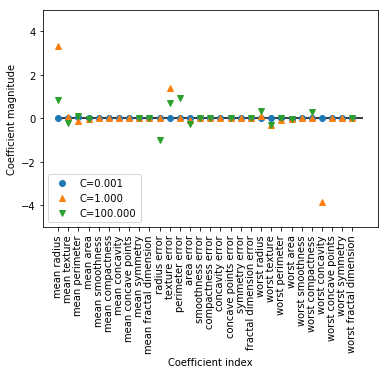

In [27]:
#使用L1正则的逻辑斯蒂回归
for C, marker in zip([0.001, 1, 100], ['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Train accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C,lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5,5)
plt.legend(loc=3)